In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [4]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [5]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | As someone who flies relentl...
1,✅ Trip Verified | Flew with British Airways ...
2,✅ Trip Verified | Straightforward check in T...
3,Not Verified | I am beyond upset and disgusted...
4,✅ Trip Verified | I purchased round trip dir...


In [8]:
df

,reviews
0,✅ Trip Verified | As someone who flies relentl...
1,✅ Trip Verified | Flew with British Airways ...
2,✅ Trip Verified | Straightforward check in T...
3,Not Verified | I am beyond upset and disgusted...
4,✅ Trip Verified | I purchased round trip dir...
...,...
995,✅ Trip Verified | Madrid to London Heathrow. T...
996,✅ Trip Verified | BA762 Heathrow to Oslo I hav...
997,✅ Trip Verified | Hamburg to Abu Dhabi via Lon...
998,✅ Trip Verified | New York to Glasgow via Lond...


In [10]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [12]:
df

,reviews
0,As someone who flies relentlessly with Britis...
1,Flew with British Airways club Europe on Sa...
2,Straightforward check in T5. New site for c...
3,I am beyond upset and disgusted with the disr...
4,I purchased round trip direct flight busine...
...,...
995,Madrid to London Heathrow. This was my second...
996,BA762 Heathrow to Oslo I have flown with BA a...
997,Hamburg to Abu Dhabi via London Heathrow. Ini...
998,New York to Glasgow via London. A routine and...


In [14]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,As someone who flies relentlessly with Britis...,As someone who flies relentlessly with Britis...
1,Flew with British Airways club Europe on Sa...,Flew with British Airways club Europe on Satu...
2,Straightforward check in T5. New site for c...,Straightforward check in T New site for club ...
3,I am beyond upset and disgusted with the disr...,I am beyond upset and disgusted with the disr...
4,I purchased round trip direct flight busine...,I purchased round trip direct flight business...


In [16]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chand\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chand\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chand\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [18]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\chand\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\chand\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,Cleaned Reviews,POS tagged
0,As someone who flies relentlessly with Britis...,As someone who flies relentlessly with Britis...,"[(someone, n), (flies, v), (relentlessly, r), ..."
1,Flew with British Airways club Europe on Sa...,Flew with British Airways club Europe on Satu...,"[(Flew, n), (British, n), (Airways, n), (club,..."
2,Straightforward check in T5. New site for c...,Straightforward check in T New site for club ...,"[(Straightforward, n), (check, n), (New, n), (..."
3,I am beyond upset and disgusted with the disr...,I am beyond upset and disgusted with the disr...,"[(beyond, None), (upset, n), (disgusted, v), (..."
4,I purchased round trip direct flight busine...,I purchased round trip direct flight business...,"[(purchased, v), (round, n), (trip, n), (direc..."


In [19]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,As someone who flies relentlessly with Britis...,As someone who flies relentlessly with Britis...,"[(someone, n), (flies, v), (relentlessly, r), ...",someone fly relentlessly British Airways bus...
1,Flew with British Airways club Europe on Sa...,Flew with British Airways club Europe on Satu...,"[(Flew, n), (British, n), (Airways, n), (club,...",Flew British Airways club Europe Saturday st...
2,Straightforward check in T5. New site for c...,Straightforward check in T New site for club ...,"[(Straightforward, n), (check, n), (New, n), (...",Straightforward check New site club check wo...
3,I am beyond upset and disgusted with the disr...,I am beyond upset and disgusted with the disr...,"[(beyond, None), (upset, n), (disgusted, v), (...",beyond upset disgust disregard lack knowledg...
4,I purchased round trip direct flight busine...,I purchased round trip direct flight business...,"[(purchased, v), (round, n), (trip, n), (direc...",purchase round trip direct flight business c...


In [20]:
df[['reviews','Lemma']]

,reviews,Lemma
0,As someone who flies relentlessly with Britis...,someone fly relentlessly British Airways bus...
1,Flew with British Airways club Europe on Sa...,Flew British Airways club Europe Saturday st...
2,Straightforward check in T5. New site for c...,Straightforward check New site club check wo...
3,I am beyond upset and disgusted with the disr...,beyond upset disgust disregard lack knowledg...
4,I purchased round trip direct flight busine...,purchase round trip direct flight business c...
...,...,...
995,Madrid to London Heathrow. This was my second...,Madrid London Heathrow second trip Madrid Lo...
996,BA762 Heathrow to Oslo I have flown with BA a...,BA Heathrow Oslo fly BA time last month come...
997,Hamburg to Abu Dhabi via London Heathrow. Ini...,Hamburg Abu Dhabi via London Heathrow Initia...
998,New York to Glasgow via London. A routine and...,New York Glasgow via London routine smooth o...


In [21]:
!pip install vaderSentiment

   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   ------ -------------------------------- 20.5/126.0 kB 682.7 kB/s eta 0:00:01
   ------------ -------------------------- 41.0/126.0 kB 495.5 kB/s eta 0:00:01
   ---------------------------------------- 126.0/126.0 kB 1.1 MB/s eta 0:00:00


In [22]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,As someone who flies relentlessly with Britis...,As someone who flies relentlessly with Britis...,"[(someone, n), (flies, v), (relentlessly, r), ...",someone fly relentlessly British Airways bus...,0.8271,Positive
1,Flew with British Airways club Europe on Sa...,Flew with British Airways club Europe on Satu...,"[(Flew, n), (British, n), (Airways, n), (club,...",Flew British Airways club Europe Saturday st...,-0.8402,Negative
2,Straightforward check in T5. New site for c...,Straightforward check in T New site for club ...,"[(Straightforward, n), (check, n), (New, n), (...",Straightforward check New site club check wo...,0.8176,Positive
3,I am beyond upset and disgusted with the disr...,I am beyond upset and disgusted with the disr...,"[(beyond, None), (upset, n), (disgusted, v), (...",beyond upset disgust disregard lack knowledg...,-0.9462,Negative
4,I purchased round trip direct flight busine...,I purchased round trip direct flight business...,"[(purchased, v), (round, n), (trip, n), (direc...",purchase round trip direct flight business c...,-0.8720,Negative


In [23]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Analysis
Positive    465
Negative    424
Neutral     111
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x21bff2390d0>,
 [Text(0.12070772991605276, 1.0933570523568745, 'Positive'),
  Text(-0.48703404749398377, -0.9863051437469178, 'Negative'),
  Text(1.2687461318934807, -0.4612843513553554, 'Neutral')],
 [Text(0.06584057995421058, 0.5963765740128406, '46.5%'),
  Text(-0.2656549349967184, -0.5379846238619551, '42.4%'),
  Text(0.7988401571181173, -0.29043829529781634, '11.1%')])

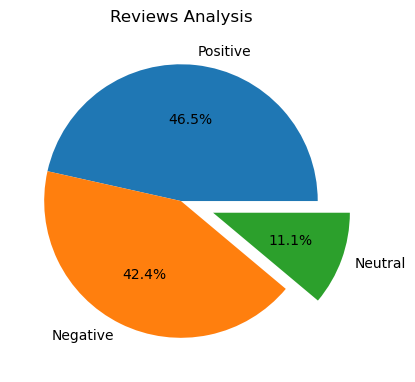

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [32]:
df.to_csv("BA_reviews.csv")

   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   ------------------- -------------------- 143.4/301.4 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 301.4/301.4 kB 2.7 MB/s eta 0:00:00


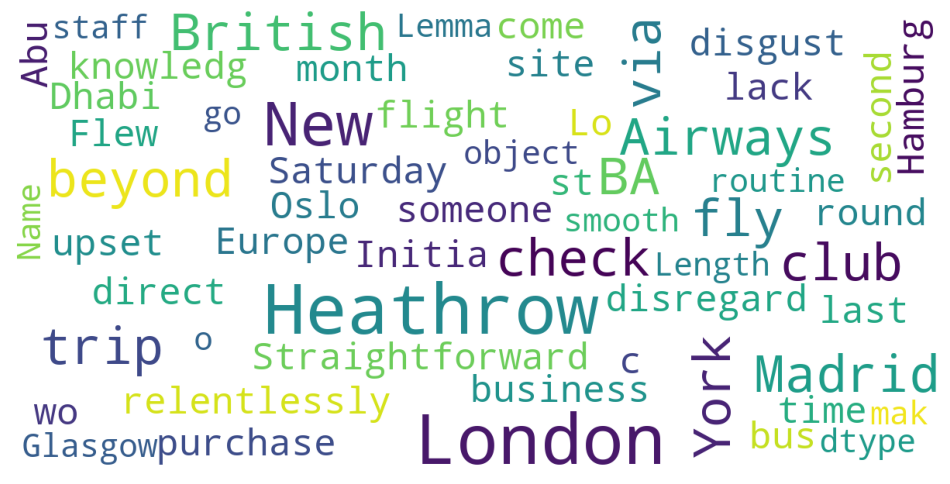

In [36]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)